In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
diamonds = sns.load_dataset('diamonds')
diamonds # notice shape, unit, key, etc...

# my turn: lets do the usual immediate explorations including the categorical vars
diamonds.describe()
# my turn: explore carats - how many are 0.99 vs 1 carat? why?
diamonds['cut'].value_counts()
diamonds['clarity'].describe()

count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object

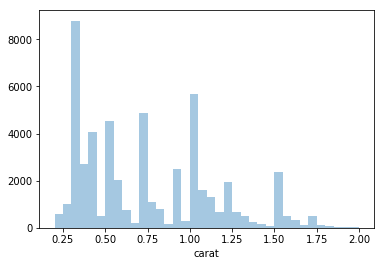

In [3]:
# explore dist of x, y, z: what did you learn? which is width, length, depth?
sns.distplot(diamonds['carat'],kde=False,bins=np.arange(0.2,2.05,.05).tolist())


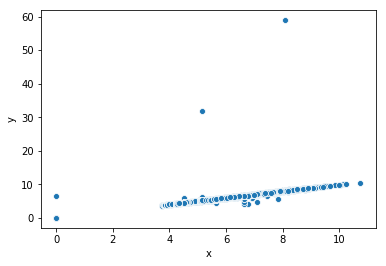

In [4]:
sns.scatterplot(data=diamonds,x='x',y='y')

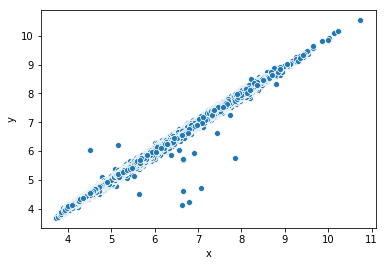

In [5]:
sns.scatterplot(data=diamonds.query('y<15 & x>2.5'),x='x',y='y')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: unsupported operand type(s) for +: 'float' and 'str'

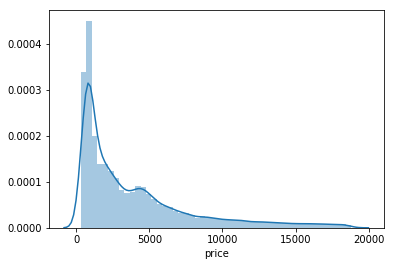

In [13]:
# your turn: explore price - is there anything unusual? (HINT: try many bin widths)

#sns.distplot(diamonds['price'],kde=False,bins=5000.tolist())
sns.distplot(diamonds['price'])
sns.distplot(diamonds.query('price'),bins=5000)

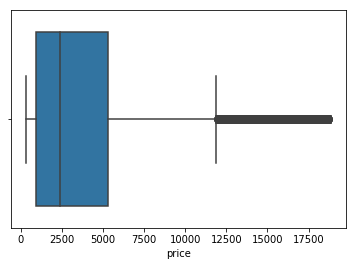

In [9]:
sns.boxplot(diamonds['price'])

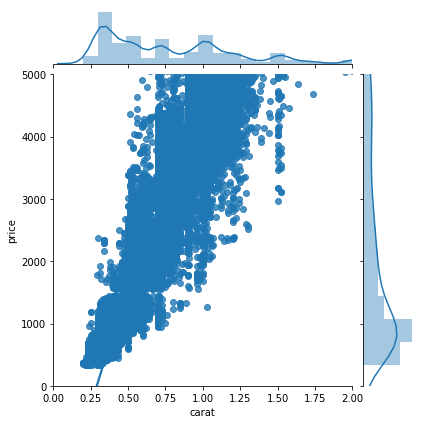

In [17]:
sns.jointplot(data=diamonds,x='carat',y='price',kind='reg',
             xlim=(0,2),ylim=(0,5000))
#reg or hex

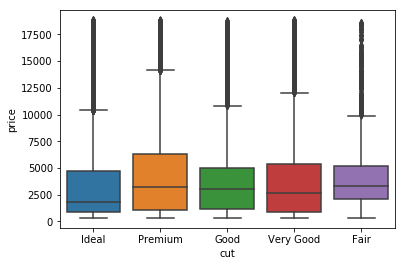

In [31]:
# my turn: how is carat related to price?

# your turn: how is price related to cut?
sns.boxplot(data=diamonds,x='cut',y='price')


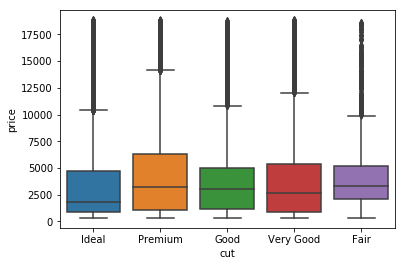

In [29]:

# how should we deal with outliers? delete obs? replace with nan? winsorize? show each...

# Visualization practice

In [32]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr # you might need to install this (see above)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# don't copy and paste these lists and number in several places 
# (which is what the original "simple program" did... that's bad programming!)
# instead, create a var - if we change it here, it changes everywhere
stocks = ['AAPL','MSFT','VZ']
start_yr = 2000

# load
stock_prices = pdr.get_data_yahoo(stocks, start=start_yr)
stock_prices = stock_prices.filter(like='Adj Close') # reduce to just columns with this in the name
stock_prices.columns = stocks # put their tickers as column names
stock_prices # print

,AAPL,MSFT,VZ
Date,,,
2000-01-03,3.470226,37.495686,20.721500
2000-01-04,3.177650,36.229057,20.051672
2000-01-05,3.224152,36.611080,20.721500
2000-01-06,2.945139,35.384666,20.631170
2000-01-07,3.084645,35.847076,20.478834
2000-01-10,3.030393,36.108448,20.370028
2000-01-11,2.875386,35.183617,20.179594
2000-01-12,2.702940,34.037640,19.499504
2000-01-13,2.999391,34.680992,19.347162


In [35]:
stock_prices.stack().swaplevel().sort_index().reset_index()

,level_0,Date,0
0,AAPL,2000-01-03,3.470226
1,AAPL,2000-01-04,3.177650
2,AAPL,2000-01-05,3.224152
3,AAPL,2000-01-06,2.945139
4,AAPL,2000-01-07,3.084645
5,AAPL,2000-01-10,3.030393
6,AAPL,2000-01-11,2.875386
7,AAPL,2000-01-12,2.702940
8,AAPL,2000-01-13,2.999391
9,AAPL,2000-01-14,3.113708


In [36]:
# this is wide data... so if we want to create a new variable, we have to do it once for each firm...
# what if we have 1000 firms? seems tough to do...
# make long/tidy:
stock_prices = stock_prices.stack().swaplevel().sort_index().reset_index()
stock_prices.columns = ['Firm','Date','Adj Close']
stock_prices # print - now that is formatted nicely, like CRSP! 

# note: we might have to tweak the regression section of "Simple Program"
# to work with the long data, but I suspect that it would be shorter code and 
# more "generally applicable" (ie easily work with N=1000+ firms)

,Firm,Date,Adj Close
0,AAPL,2000-01-03,3.470226
1,AAPL,2000-01-04,3.177650
2,AAPL,2000-01-05,3.224152
3,AAPL,2000-01-06,2.945139
4,AAPL,2000-01-07,3.084645
5,AAPL,2000-01-10,3.030393
6,AAPL,2000-01-11,2.875386
7,AAPL,2000-01-12,2.702940
8,AAPL,2000-01-13,2.999391
9,AAPL,2000-01-14,3.113708


In [38]:
# add return var.
# MAKE SURE YOU CREATE THE VARIABLES WITHIN EACH FIRM - use groupby
stock_prices['ret'] = stock_prices.groupby('Firm')['Adj Close'].pct_change()
stock_prices # print - the first ret for each firm should be missing...

stock_prices.groupby('Firm')

stock_prices.groupby('Firm')         ['Adj Close'].pct_change()

0             NaN
1       -0.084310
2        0.014634
3       -0.086538
4        0.047368
5       -0.017588
6       -0.051151
7       -0.059973
8        0.109678
9        0.038113
10       0.034848
11       0.025256
12       0.065103
13      -0.019273
14      -0.045480
15       0.056471
16      -0.018374
17      -0.001702
18      -0.076136
19       0.020910
20      -0.033735
21      -0.014339
22       0.045541
23       0.045372
24       0.056135
25       0.007123
26      -0.019587
27       0.007769
28      -0.041850
29       0.064942
           ...   
15153   -0.005700
15154   -0.010647
15155   -0.002152
15156   -0.011117
15157    0.001846
15158   -0.004146
15159    0.002379
15160    0.002712
15161   -0.001860
15162    0.001016
15163    0.009645
15164    0.007709
15165    0.003160
15166    0.002653
15167    0.000496
15168   -0.003801
15169   -0.006138
15170    0.013186
15171   -0.019275
15172   -0.002856
15173    0.001348
15174   -0.023385
15175    0.004134
15176    0.014411
15177    0

In [39]:
(stock_prices
     .groupby('Firm')         #for each firm
['Adj Close'].pct_change()    #compute percent change in 'Adj Close' from obs to obs
)

0             NaN
1       -0.084310
2        0.014634
3       -0.086538
4        0.047368
5       -0.017588
6       -0.051151
7       -0.059973
8        0.109678
9        0.038113
10       0.034848
11       0.025256
12       0.065103
13      -0.019273
14      -0.045480
15       0.056471
16      -0.018374
17      -0.001702
18      -0.076136
19       0.020910
20      -0.033735
21      -0.014339
22       0.045541
23       0.045372
24       0.056135
25       0.007123
26      -0.019587
27       0.007769
28      -0.041850
29       0.064942
           ...   
15153   -0.005700
15154   -0.010647
15155   -0.002152
15156   -0.011117
15157    0.001846
15158   -0.004146
15159    0.002379
15160    0.002712
15161   -0.001860
15162    0.001016
15163    0.009645
15164    0.007709
15165    0.003160
15166    0.002653
15167    0.000496
15168   -0.003801
15169   -0.006138
15170    0.013186
15171   -0.019275
15172   -0.002856
15173    0.001348
15174   -0.023385
15175    0.004134
15176    0.014411
15177    0

In [45]:
stock_prices['ret'] = (stock_prices
                           .groupby('Firm')
                           ['Adj Close'].pct_change())
#stock_prices['ret']
print(stock_prices)


       Firm       Date  Adj Close       ret
0      AAPL 2000-01-03   3.470226       NaN
1      AAPL 2000-01-04   3.177650 -0.084310
2      AAPL 2000-01-05   3.224152  0.014634
3      AAPL 2000-01-06   2.945139 -0.086538
4      AAPL 2000-01-07   3.084645  0.047368
5      AAPL 2000-01-10   3.030393 -0.017588
6      AAPL 2000-01-11   2.875386 -0.051151
7      AAPL 2000-01-12   2.702940 -0.059973
8      AAPL 2000-01-13   2.999391  0.109678
9      AAPL 2000-01-14   3.113708  0.038113
10     AAPL 2000-01-18   3.222214  0.034848
11     AAPL 2000-01-19   3.303592  0.025256
12     AAPL 2000-01-20   3.518665  0.065103
13     AAPL 2000-01-21   3.450849 -0.019273
14     AAPL 2000-01-24   3.293904 -0.045480
15     AAPL 2000-01-25   3.479914  0.056471
16     AAPL 2000-01-26   3.415973 -0.018374
17     AAPL 2000-01-27   3.410160 -0.001702
18     AAPL 2000-01-28   3.150523 -0.076136
19     AAPL 2000-01-31   3.216401  0.020910
20     AAPL 2000-02-01   3.107896 -0.033735
21     AAPL 2000-02-02   3.06333

In [46]:
stock_prices.describe()

,Adj Close,ret
count,15183.000000,15182.000000
mean,40.522536,0.000567
std,44.718310,0.022722
min,0.813478,-0.887322
25%,16.724260,-0.008282
50%,22.372755,0.000456
75%,45.214401,0.009470
max,327.200012,0.195652


# Q2

In [49]:
stock_prices.groupby('Firm')          ['ret'].describe()

,count,mean,std,min,25%,50%,75%,max
Firm,,,,,,,,
AAPL,5060.0,0.001234,0.025352,-0.518692,-0.010326,0.000899,0.012946,0.139049
MSFT,5061.0,0.000319,0.022681,-0.884540,-0.008065,0.000336,0.008929,0.195652
VZ,5061.0,0.000148,0.019780,-0.887322,-0.007253,0.000394,0.007705,0.146324
